# Overview of the iris dataset

In [10]:
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
import plotly.graph_objs as go

%matplotlib inline

In [11]:
df = pd.read_csv('Iris.csv', index_col=0)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


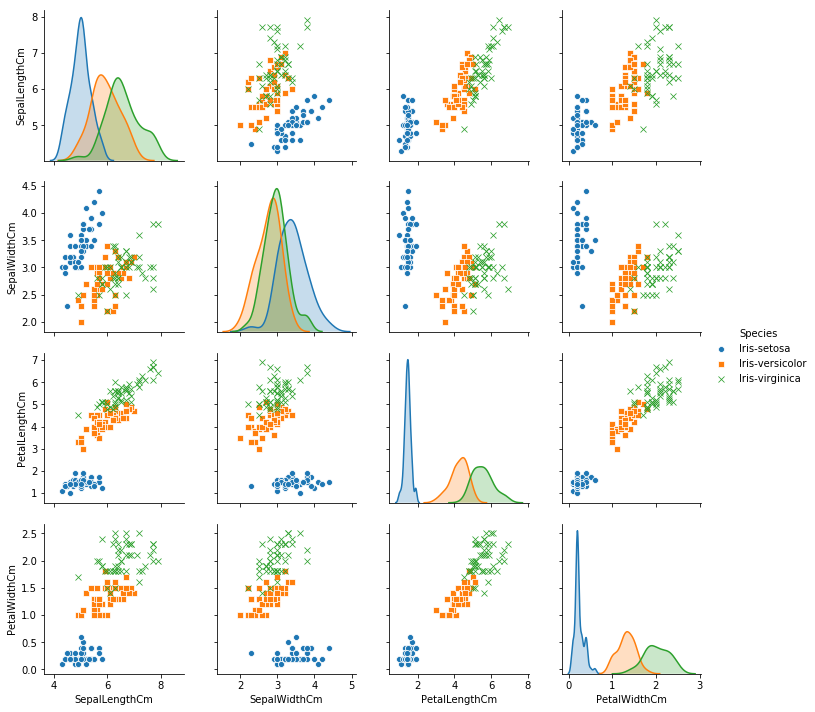

In [12]:
sns.pairplot(df, hue='Species', markers=['o', 's', 'x'])

In [13]:
#fig = plt.figure(figsize=(12, 12))
#ax = fig.add_subplot(111, projection='3d')
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

df_reduced = PCA(n_components=3).fit_transform(df[features])

markers = ['circle', 'square', 'x']
colors = ['blue', 'orange', 'green']

traces = []

for specie_df in df['Species'].unique():
    xs = df_reduced[df['Species'] == specie_df][:,0]
    ys = df_reduced[df['Species'] == specie_df][:,1]
    zs = df_reduced[df['Species'] == specie_df][:,2]

#    ax.scatter(xs, ys, zs, marker = markers.pop(0))
    traces.append(go.Scatter3d(x=xs, 
                         y=ys, 
                         z=zs,
                         mode='markers',
                         marker=dict(
                             size=6,
                             color=colors.pop(0),  
                             opacity=0.8,
                             symbol=markers.pop(0)),
                             name=specie_df
                        )
                 )
layout=go.Layout(title='First three PCA directions',
                 scene=dict(
                         xaxis=dict(title='1st eigenvector'),
                         yaxis=dict(title='2nd eigenvector'),
                         zaxis=dict(title='3rd eigenvector'))
                 )
fig = go.Figure(data=traces, layout=layout)
fig.show()